**Question 6 -**

Using the data from Question 3(pokemon_data.xlsx), write code to analyze the data and answer the following questions 

**Note** 
1. Draw plots to demonstrate the analysis for the following questions for better visualizations.

2. Write code comments wherever required for code understanding


**Insights to be drawn -**

● Get all Pokemons whose spawn rate is less than 5%

● Get all Pokemons that have less than 4 weaknesses

● Get all Pokemons that have no multipliers at all

● Get all Pokemons that do not have more than 2 evolutions

● Get all Pokemons whose spawn time is less than 300 seconds.

**Note** - spawn time format is "05:32”, so assume “minute: second” format and perform the analysis.

● Get all Pokemon who have more than two types of capabilities

In [170]:
## required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import ast

In [171]:
cwd = os.getcwd()
excel_file_name = "pokemon_data.xlsx"
excel_file_path = cwd.replace("python", excel_file_name)

excel_file_path

'/media/tinku/Education/iNEURON/FSDS-Final-Assesment/pokemon_data.xlsx'

In [172]:
## Data Ingestion

pokemon_df = pd.read_excel(excel_file_path)

pokemon_df.head()

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution
0,1,1,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"['Grass', 'Poison']",0.71 m,6.9 kg,Bulbasaur Candy,25.0,2 km,0.690,69.0,20:00,[1.58],"['Fire', 'Ice', 'Flying', 'Psychic']","[{'num': '002', 'name': 'Ivysaur'}, {'num': '0...",NaN
1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"['Grass', 'Poison']",0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,0.042,4.2,07:00,"[1.2, 1.6]","['Fire', 'Ice', 'Flying', 'Psychic']","[{'num': '003', 'name': 'Venusaur'}]","[{'num': '001', 'name': 'Bulbasaur'}]"
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"['Grass', 'Poison']",2.01 m,100.0 kg,Bulbasaur Candy,NaN,Not in Eggs,0.017,1.7,11:30,NaN,"['Fire', 'Ice', 'Flying', 'Psychic']",NaN,"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ..."
3,4,4,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,['Fire'],0.61 m,8.5 kg,Charmander Candy,25.0,2 km,0.253,25.3,08:45,[1.65],"['Water', 'Ground', 'Rock']","[{'num': '005', 'name': 'Charmeleon'}, {'num':...",NaN
4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,['Fire'],1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,0.012,1.2,19:00,[1.79],"['Water', 'Ground', 'Rock']","[{'num': '006', 'name': 'Charizard'}]","[{'num': '004', 'name': 'Charmander'}]"


In [173]:
pokemon_df.shape

(151, 17)

In [174]:
pokemon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              151 non-null    int64  
 1   num             151 non-null    int64  
 2   name            151 non-null    object 
 3   img             151 non-null    object 
 4   type            151 non-null    object 
 5   height          151 non-null    object 
 6   weight          151 non-null    object 
 7   candy           124 non-null    object 
 8   candy_count     70 non-null     float64
 9   egg             151 non-null    object 
 10  spawn_chance    151 non-null    float64
 11  avg_spawns      151 non-null    float64
 12  spawn_time      145 non-null    object 
 13  multipliers     70 non-null     object 
 14  weaknesses      151 non-null    object 
 15  next_evolution  70 non-null     object 
 16  prev_evolution  72 non-null     object 
dtypes: float64(3), int64(2), object(12)

### 1st query : Get all Pokemons whose spawn rate is less than 5%


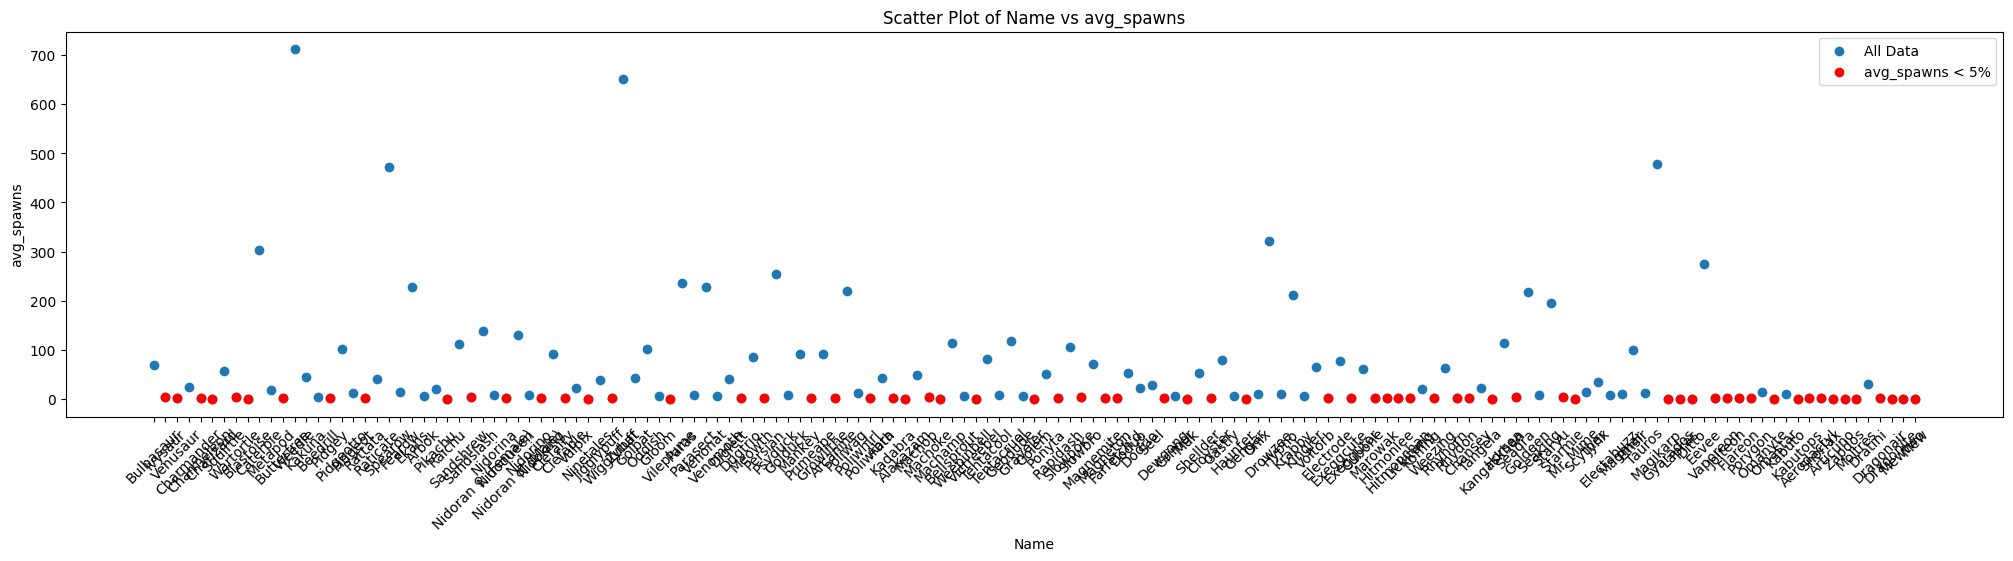

In [175]:
## We can get spwan rate from the avg_spawns column

# Filter the DataFrame for rows where 'avg_spwan' is less than 5%
filtered_df = pokemon_df[pokemon_df['avg_spawns'] < 5]

# Plot the 'name' column against the 'avg_spwan' column
plt.figure(figsize=(25,5))
plt.scatter(pokemon_df['name'], pokemon_df['avg_spawns'], label='All Data')
plt.scatter(filtered_df['name'], filtered_df['avg_spawns'], color='red', label='avg_spawns < 5%')
plt.xlabel('Name')
plt.ylabel('avg_spawns')
plt.title('Scatter Plot of Name vs avg_spawns')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [176]:
filtered_df[["name", "avg_spawns"]]

,name,avg_spawns
1,Ivysaur,4.20
2,Venusaur,1.70
4,Charmeleon,1.20
5,Charizard,0.31
7,Wartortle,3.40
...,...,...
145,Moltres,0.00
147,Dragonair,2.00
148,Dragonite,0.11
149,Mewtwo,0.00


**Conclusions:**

There are 67 pokemons whose spwan rate is less than 5%.

### 2nd Query: Get all Pokemons that have less than 4 weaknesses

In [177]:
# "weaknesses" column contains string lists
pokemon_df["weaknesses"][10]

"['Fire', 'Flying', 'Rock']"

In [178]:
# type checking
type(pokemon_df["weaknesses"][10])

str

In [179]:
# we need to convert it into actual list of strings using ast.literal_eval() function from ast module

pokemon_df["weaknesses"] = pokemon_df["weaknesses"].apply(lambda x: ast.literal_eval(x))

pokemon_df["weaknesses"][10]

['Fire', 'Flying', 'Rock']

In [180]:
# type checking
type(pokemon_df["weaknesses"][10])

list

In [181]:
# count the number of weaknesses
len(pokemon_df["weaknesses"][2])

4

In [182]:
# Now we can create another column for weaknesses count using len() function in apply() method

pokemon_df["weaknesses_count"] = pokemon_df["weaknesses"].apply(lambda x: len(x))

In [183]:
pokemon_df.head()

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution,weaknesses_count
0,1,1,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"['Grass', 'Poison']",0.71 m,6.9 kg,Bulbasaur Candy,25.0,2 km,0.690,69.0,20:00,[1.58],"[Fire, Ice, Flying, Psychic]","[{'num': '002', 'name': 'Ivysaur'}, {'num': '0...",NaN,4
1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"['Grass', 'Poison']",0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,0.042,4.2,07:00,"[1.2, 1.6]","[Fire, Ice, Flying, Psychic]","[{'num': '003', 'name': 'Venusaur'}]","[{'num': '001', 'name': 'Bulbasaur'}]",4
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"['Grass', 'Poison']",2.01 m,100.0 kg,Bulbasaur Candy,NaN,Not in Eggs,0.017,1.7,11:30,NaN,"[Fire, Ice, Flying, Psychic]",NaN,"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ...",4
3,4,4,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,['Fire'],0.61 m,8.5 kg,Charmander Candy,25.0,2 km,0.253,25.3,08:45,[1.65],"[Water, Ground, Rock]","[{'num': '005', 'name': 'Charmeleon'}, {'num':...",NaN,3
4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,['Fire'],1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,0.012,1.2,19:00,[1.79],"[Water, Ground, Rock]","[{'num': '006', 'name': 'Charizard'}]","[{'num': '004', 'name': 'Charmander'}]",3


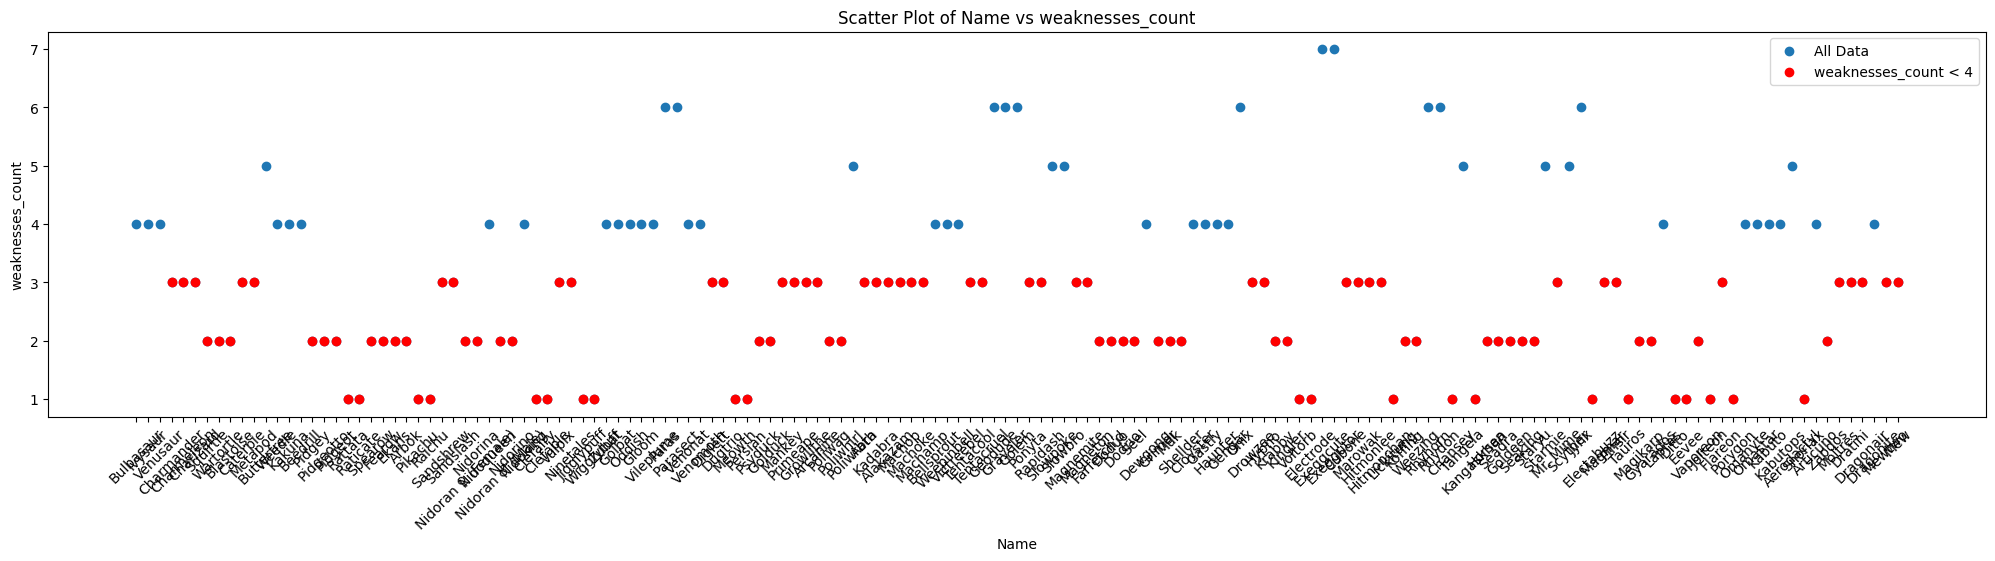

In [184]:
# Filter the DataFrame for rows where 'avg_spwan' is less than 5%
filtered_df = pokemon_df[pokemon_df['weaknesses_count'] < 4]

# Plot the 'name' column against the 'avg_spwan' column
plt.figure(figsize=(25,5))
plt.scatter(pokemon_df['name'], pokemon_df['weaknesses_count'], label='All Data')
plt.scatter(filtered_df['name'], filtered_df['weaknesses_count'], color='red', label='weaknesses_count < 4')
plt.xlabel('Name')
plt.ylabel('weaknesses_count')
plt.title('Scatter Plot of Name vs weaknesses_count')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [185]:
filtered_df[["name", "weaknesses_count"]]

,name,weaknesses_count
3,Charmander,3
4,Charmeleon,3
5,Charizard,3
6,Squirtle,2
7,Wartortle,2
...,...,...
145,Moltres,3
146,Dratini,3
147,Dragonair,3
149,Mewtwo,3


**Conclusion:**

There are 102 pokemons who have less than 4 weaknesses.

### 3rd Query: Get all Pokemons that have no multipliers at all

In [186]:
pokemon_df["multipliers"].unique()

array(['[1.58]', '[1.2, 1.6]', nan, '[1.65]', '[1.79]', '[2.1]', '[1.4]',
       '[1.05]', '[3.55, 3.79]', '[1.01, 1.09]', '[3.01, 3.41]',
       '[1.71, 1.92]', '[2.55, 2.73]', '[2.66, 2.68]', '[2.21, 2.27]',
       '[2.34]', '[2.45]', '[1.63, 2.48]', '[1.83, 2.48]', '[1.64, 1.7]',
       '[1.83]', '[2.03, 2.14]', '[2.74, 2.81]', '[1.85]', '[2.6, 3.67]',
       '[1.5]', '[1.49]', '[2.02]', '[1.86, 1.9]', '[2.69]', '[1.98]',
       '[2.27]', '[2.17, 2.28]', '[2.31, 2.36]', '[1.72, 1.73]', '[1.95]',
       '[1.36, 1.95]', '[1.64, 1.65]', '[1.7]', '[1.57]', '[1.59]',
       '[2.52]', '[1.75, 1.76]', '[1.64, 1.72]', '[1.48, 1.5]', '[2.21]',
       '[2.16, 2.17]', '[2.19, 2.24]', '[1.04, 1.96]', '[2.44]', '[2.65]',
       '[1.78]', '[1.56, 1.8]', '[2.08, 2.09]', '[2.36, 2.4]',
       '[2.01, 2.02]', '[2.7, 3.18]', '[1.67]', '[1.11]', '[1.91]',
       '[2.23]', '[2.15, 2.2]', '[2.38, 2.41]', '[10.1, 11.8]',
       '[2.02, 2.64]', '[2.12]', '[1.97, 2.37]', '[1.83, 1.84]', '[2.05]'],
      dt

In [187]:
# DataFrame that contains all Pokemons that have no multipliers at all
no_multi = pokemon_df[pokemon_df["multipliers"].isna()]

In [188]:
no_multi[["name", "multipliers"]]

,name,multipliers
2,Venusaur,NaN
5,Charizard,NaN
8,Blastoise,NaN
11,Butterfree,NaN
14,Beedrill,NaN
...,...,...
144,Zapdos,NaN
145,Moltres,NaN
148,Dragonite,NaN
149,Mewtwo,NaN


**Conclusion:**

There are 81 pokemons who have no mulpipliers at all.

### 4th Query: Get all Pokemons that do not have more than 2 evolutions

In [189]:
# To find total no of evolutions, we need to find the number of previous evolutions and the number of next evolutions and add them together

# let's first convert the previous evolutions and next evolutions columns to actual list of dictionaries
# while doing so we need to take care of NaN values also
pokemon_df["prev_evolution"] = pokemon_df["prev_evolution"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else np.NaN) 
pokemon_df["next_evolution"] = pokemon_df["next_evolution"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else np.NaN) 

# now we need to create two new columns to store the count of evolutions
pokemon_df["prev_evolution_count"] = pokemon_df["prev_evolution"].apply(lambda x: len(x) if isinstance(x, list) else 0)
pokemon_df["next_evolution_count"] = pokemon_df["next_evolution"].apply(lambda x: len(x) if isinstance(x, list) else 0)

# Find the total number of evolutions
pokemon_df["total_evolutions"] = pokemon_df["prev_evolution_count"] + pokemon_df["next_evolution_count"]

pokemon_df.head()

,id,num,name,img,type,height,weight,candy,candy_count,egg,...,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution,weaknesses_count,prev_evolution_count,next_evolution_count,total_evolutions
0,1,1,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"['Grass', 'Poison']",0.71 m,6.9 kg,Bulbasaur Candy,25.0,2 km,...,69.0,20:00,[1.58],"[Fire, Ice, Flying, Psychic]","[{'num': '002', 'name': 'Ivysaur'}, {'num': '0...",NaN,4,0,2,2
1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"['Grass', 'Poison']",0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,...,4.2,07:00,"[1.2, 1.6]","[Fire, Ice, Flying, Psychic]","[{'num': '003', 'name': 'Venusaur'}]","[{'num': '001', 'name': 'Bulbasaur'}]",4,1,1,2
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"['Grass', 'Poison']",2.01 m,100.0 kg,Bulbasaur Candy,NaN,Not in Eggs,...,1.7,11:30,NaN,"[Fire, Ice, Flying, Psychic]",NaN,"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ...",4,2,0,2
3,4,4,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,['Fire'],0.61 m,8.5 kg,Charmander Candy,25.0,2 km,...,25.3,08:45,[1.65],"[Water, Ground, Rock]","[{'num': '005', 'name': 'Charmeleon'}, {'num':...",NaN,3,0,2,2
4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,['Fire'],1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,...,1.2,19:00,[1.79],"[Water, Ground, Rock]","[{'num': '006', 'name': 'Charizard'}]","[{'num': '004', 'name': 'Charmander'}]",3,1,1,2


In [190]:
pokemon_df[pokemon_df.total_evolutions >= 3]

,id,num,name,img,type,height,weight,candy,candy_count,egg,...,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution,weaknesses_count,prev_evolution_count,next_evolution_count,total_evolutions
132,133,133,Eevee,http://www.serebii.net/pokemongo/pokemon/133.png,['Normal'],0.30 m,6.5 kg,Eevee Candy,25.0,10 km,...,275.0,05:32,"[2.02, 2.64]",[Fighting],"[{'num': '134', 'name': 'Vaporeon'}, {'num': '...",NaN,1,0,3,3


**Conclusion:**

Only 1 pokemon has more than 2 evolution. Remaining all 150 pokemons do not have more than 2 evolutions.

### 5th Query: Get all Pokemons whose spawn time is less than 300 seconds.

In [191]:
# checking for NaN values in spwan time column
pokemon_df[pokemon_df["spawn_time"].isna()]

,id,num,name,img,type,height,weight,candy,candy_count,egg,...,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution,weaknesses_count,prev_evolution_count,next_evolution_count,total_evolutions
131,132,132,Ditto,http://www.serebii.net/pokemongo/pokemon/132.png,['Normal'],0.30 m,4.0 kg,NaN,NaN,Not in Eggs,...,0.0,NaN,NaN,[Fighting],NaN,NaN,1,0,0,0
143,144,144,Articuno,http://www.serebii.net/pokemongo/pokemon/144.png,"['Ice', 'Flying']",1.70 m,55.4 kg,NaN,NaN,Not in Eggs,...,0.0,NaN,NaN,"[Fire, Electric, Rock, Steel]",NaN,NaN,4,0,0,0
144,145,145,Zapdos,http://www.serebii.net/pokemongo/pokemon/145.png,"['Electric', 'Flying']",1.60 m,52.6 kg,NaN,NaN,Not in Eggs,...,0.0,NaN,NaN,"[Ice, Rock]",NaN,NaN,2,0,0,0
145,146,146,Moltres,http://www.serebii.net/pokemongo/pokemon/146.png,"['Fire', 'Flying']",2.01 m,60.0 kg,NaN,NaN,Not in Eggs,...,0.0,NaN,NaN,"[Water, Electric, Rock]",NaN,NaN,3,0,0,0
149,150,150,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,['Psychic'],2.01 m,122.0 kg,NaN,NaN,Not in Eggs,...,0.0,NaN,NaN,"[Bug, Ghost, Dark]",NaN,NaN,3,0,0,0
150,151,151,Mew,http://www.serebii.net/pokemongo/pokemon/151.png,['Psychic'],0.41 m,4.0 kg,NaN,NaN,Not in Eggs,...,0.0,NaN,NaN,"[Bug, Ghost, Dark]",NaN,NaN,3,0,0,0


In [192]:
# Unique values in spwan time column
pokemon_df["spawn_time"].unique()

array(['20:00', '07:00', '11:30', '08:45', '19:00', '13:34', '04:25',
       '07:02', '00:06', '16:35', '02:11', '05:23', '02:21', '02:30',
       '04:50', '01:34', '01:30', '01:50', '01:55', '01:56', '12:25',
       '01:11', '12:20', '04:00', '23:58', '01:58', '12:34', '01:51',
       '07:22', '12:35', '01:12', '09:02', '12:16', '03:30', '03:29',
       '13:43', '01:32', '08:46', '12:28', '02:15', '03:58', '11:33',
       '01:42', '01:22', '02:31', '23:40', '02:22', '12:37', '02:54',
       '02:44', '03:41', '23:06', '12:52', '12:33', '03:57', '03:11',
       '03:40', '09:14', '04:30', '11:25', '10:32', '02:55', '04:10',
       '09:45', '12:19', '03:20', '23:36', '12:40', '04:53', '02:50',
       '07:12', '02:56', '04:04', '15:25', '01:09', '05:10', '02:12',
       '06:46', '06:04', '15:11', '01:28', '07:39', '02:33', '04:21',
       '00:10', '03:55', '01:18', '02:17', '03:33', '03:44', '04:36',
       '09:09', '03:59', '05:58', '02:46', '08:16', '12:17', '03:21',
       '05:50', '04:

In [193]:
def to_sec(x):
    
    l = str(x).split(':')

    return int(l[0])*60 + int(l[1])

In [194]:
# Create a new column with the spwan_time in seconds
pokemon_df['spawn_time_in_sec'] = pokemon_df['spawn_time'].apply(lambda x: to_sec(x) if pd.notna(x) else np.nan)


In [195]:
pokemon_df[pokemon_df["spawn_time_in_sec" ]< 300]

,id,num,name,img,type,height,weight,candy,candy_count,egg,...,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution,weaknesses_count,prev_evolution_count,next_evolution_count,total_evolutions,spawn_time_in_sec
6,7,7,Squirtle,http://www.serebii.net/pokemongo/pokemon/007.png,['Water'],0.51 m,9.0 kg,Squirtle Candy,25.0,2 km,...,04:25,[2.1],"[Electric, Grass]","[{'num': '008', 'name': 'Wartortle'}, {'num': ...",NaN,2,0,2,2,265.0
8,9,9,Blastoise,http://www.serebii.net/pokemongo/pokemon/009.png,['Water'],1.60 m,85.5 kg,Squirtle Candy,NaN,Not in Eggs,...,00:06,NaN,"[Electric, Grass]",NaN,"[{'num': '007', 'name': 'Squirtle'}, {'num': '...",2,2,0,2,6.0
10,11,11,Metapod,http://www.serebii.net/pokemongo/pokemon/011.png,['Bug'],0.71 m,9.9 kg,Caterpie Candy,50.0,Not in Eggs,...,02:11,"[3.55, 3.79]","[Fire, Flying, Rock]","[{'num': '012', 'name': 'Butterfree'}]","[{'num': '010', 'name': 'Caterpie'}]",3,1,1,2,131.0
12,13,13,Weedle,http://www.serebii.net/pokemongo/pokemon/013.png,"['Bug', 'Poison']",0.30 m,3.2 kg,Weedle Candy,12.0,2 km,...,02:21,"[1.01, 1.09]","[Fire, Flying, Psychic, Rock]","[{'num': '014', 'name': 'Kakuna'}, {'num': '01...",NaN,4,0,2,2,141.0
13,14,14,Kakuna,http://www.serebii.net/pokemongo/pokemon/014.png,"['Bug', 'Poison']",0.61 m,10.0 kg,Weedle Candy,50.0,Not in Eggs,...,02:30,"[3.01, 3.41]","[Fire, Flying, Psychic, Rock]","[{'num': '015', 'name': 'Beedrill'}]","[{'num': '013', 'name': 'Weedle'}]",4,1,1,2,150.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,128,128,Tauros,http://www.serebii.net/pokemongo/pokemon/128.png,['Normal'],1.40 m,88.4 kg,NaN,NaN,5 km,...,00:37,NaN,[Fighting],NaN,NaN,1,0,0,0,37.0
129,130,130,Gyarados,http://www.serebii.net/pokemongo/pokemon/130.png,"['Water', 'Flying']",6.50 m,235.0 kg,Magikarp Candy,NaN,Not in Eggs,...,02:15,NaN,"[Electric, Rock]",NaN,"[{'num': '129', 'name': 'Magikarp'}]",2,1,0,1,135.0
134,135,135,Jolteon,http://www.serebii.net/pokemongo/pokemon/135.png,['Electric'],0.79 m,24.5 kg,NaN,NaN,Not in Eggs,...,02:30,NaN,[Ground],NaN,"[{'num': '133', 'name': 'Eevee'}]",1,1,0,1,150.0
136,137,137,Porygon,http://www.serebii.net/pokemongo/pokemon/137.png,['Normal'],0.79 m,36.5 kg,NaN,NaN,5 km,...,02:49,NaN,[Fighting],NaN,NaN,1,0,0,0,169.0


**Conclusion**

There are total 75 pokemon available whose spwan time are less than 300 seconds.

### 6th Query: Get all Pokemon who have more than two types of capabilities

In [196]:
for cap in pokemon_df["type"].unique():
    print(f"{cap} --> Count = {len(ast.literal_eval(cap))}")

['Grass', 'Poison'] --> Count = 2
['Fire'] --> Count = 1
['Fire', 'Flying'] --> Count = 2
['Water'] --> Count = 1
['Bug'] --> Count = 1
['Bug', 'Flying'] --> Count = 2
['Bug', 'Poison'] --> Count = 2
['Normal', 'Flying'] --> Count = 2
['Normal'] --> Count = 1
['Poison'] --> Count = 1
['Electric'] --> Count = 1
['Ground'] --> Count = 1
['Poison', 'Ground'] --> Count = 2
['Poison', 'Flying'] --> Count = 2
['Bug', 'Grass'] --> Count = 2
['Fighting'] --> Count = 1
['Water', 'Fighting'] --> Count = 2
['Psychic'] --> Count = 1
['Water', 'Poison'] --> Count = 2
['Rock', 'Ground'] --> Count = 2
['Water', 'Psychic'] --> Count = 2
['Water', 'Ice'] --> Count = 2
['Ghost', 'Poison'] --> Count = 2
['Grass', 'Psychic'] --> Count = 2
['Ground', 'Rock'] --> Count = 2
['Grass'] --> Count = 1
['Ice', 'Psychic'] --> Count = 2
['Water', 'Flying'] --> Count = 2
['Rock', 'Water'] --> Count = 2
['Rock', 'Flying'] --> Count = 2
['Ice', 'Flying'] --> Count = 2
['Electric', 'Flying'] --> Count = 2
['Dragon'] --

In [197]:
# Converting string list to actual list of strings
pokemon_df["type"] = pokemon_df["type"].apply(lambda x: ast.literal_eval(x))

In [198]:
# Creating new column called 'capabilities' which contains count of types column
pokemon_df["capabilities"] = pokemon_df["type"].apply(lambda x: len(x))

<Axes: >

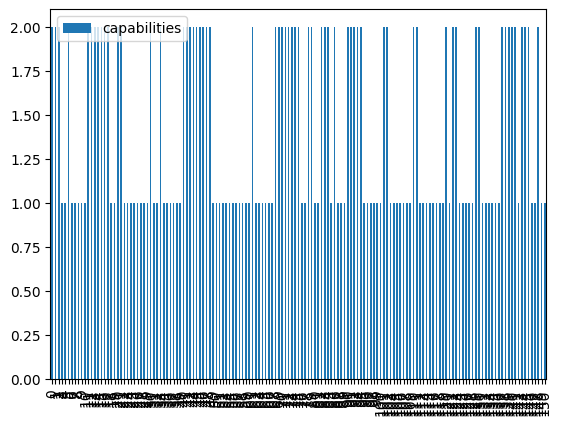

In [199]:
pokemon_df[["name", "capabilities"]].plot(kind="bar")

**Conclusion:**

There are no pokemon with more than two types of capabilities as we can see that the highest no of capabilities is 2.